Found 1 entry for Rewari:
           GID_2 GID_0 COUNTRY     GID_1   NAME_1 NL_NAME_1  NAME_2 VARNAME_2  \
185  IND.12.17_1   IND   India  IND.12_1  Haryana        NA  Rewari        NA   

    NL_NAME_2    TYPE_2 ENGTYPE_2 CC_2    HASC_2  \
185        NA  District  District   NA  IN.HR.RE   

                                              geometry  
185  POLYGON ((76.66393 28.09785, 76.65799 28.09907...  


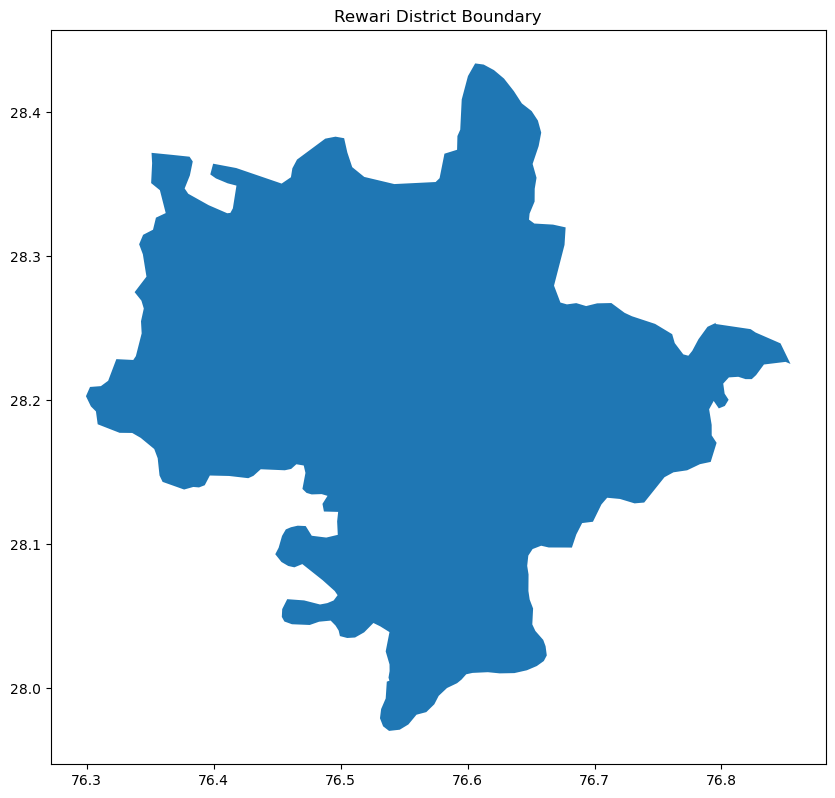


Boundary saved to ../data/rewari_boundary.geojson


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
# Make sure this path is correct
SHAPEFILE_PATH = "../data/geospatial/gadm41_IND_2.shp"
DISTRICT_NAME = "Rewari"
# ---

# Load the shapefile containing all districts of India
india_districts = gpd.read_file(SHAPEFILE_PATH)

# Filter the data to get only the Rewari district
rewari_boundary = india_districts[india_districts['NAME_2'] == DISTRICT_NAME]

# --- VERIFICATION ---
# 1. Print the data to see if it was found
print(f"Found {len(rewari_boundary)} entry for {DISTRICT_NAME}:")
print(rewari_boundary)

# 2. Plot the map to visually confirm
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
rewari_boundary.plot(ax=ax)
ax.set_title(f"{DISTRICT_NAME} District Boundary")
plt.show()

# 3. Save the boundary to a more usable format
output_path = f"../data/{DISTRICT_NAME.lower()}_boundary.geojson"
rewari_boundary.to_file(output_path, driver='GeoJSON')
print(f"\nBoundary saved to {output_path}")

In [5]:
! pip install jpype

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      
      
      Please install the `JPype` with ``pip install jpype1``
      
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [8]:
import tabula
import pandas as pd

# --- CONFIGURATION ---
# Make sure the PDF file is in this path
PDF_PATH_B = "../data/demographics/rewari_census_handbook_part_B.pdf"
# We are targeting the first page of the Rewari C.D. Block data
TARGET_PAGE = 100
# ---

# Read the tables from the specified page
# The 'lattice=True' option is good for tables with clear grid lines
tables = tabula.read_pdf(PDF_PATH_B, pages=TARGET_PAGE, lattice=True, multiple_tables=True)

# --- VERIFICATION ---
if tables:
    print(f"Successfully extracted {len(tables)} tables from page {TARGET_PAGE}.")
    # Display the first extracted table as a DataFrame
    village_data = tables[0]
    print("First few rows of the extracted table:")
    display(village_data.head())
else:
    print(f"Could not extract any tables from page {TARGET_PAGE}.")

Successfully extracted 31 tables from page 100.
First few rows of the extracted table:


,PRIMARY CENSUS ABSTRACT
0,CENSUS ABSTRACT\rRewari
1,Industrial category of main workers\rHousehold...
2,2930313233343536373839402
